In [1]:
import numpy as np
import torch
from torch import nn
from torch.distributions import MultivariateNormal

from cnp.cnp import GaussianNeuralProcess
from cnp.data import LambdaIterator
from cnp.cov import MeanFieldCov, InnerProdCov, KvvCov, AddNoNoise, AddHomoNoise

import matplotlib.pyplot as plt

device = torch.device('cuda:1')

In [2]:
data_root = '/scratches/cblgpu07/em626/kernelcnp/kernelcnp/experiments/environmental/data'

lonlat_fine = np.load(f'{data_root}/x_context_fine.npy')
lonlat_coarse = np.load(f'{data_root}/x_context_coarse.npy')
elevation_fine = np.load(f'{data_root}/y_context_fine.npy')

train_reanalysis_coarse = np.load(f'{data_root}/y_context_coarse_train.npy')
train_lonlat_station = np.load(f'{data_root}/x_target_train.npy')
train_temperature_station = np.load(f'{data_root}/y_target_train.npy')

valid_reanalysis_coarse = np.load(f'{data_root}/y_context_coarse_val.npy')
valid_lonlat_station = np.load(f'{data_root}/x_target_val.npy')
valid_temperature_station = np.load(f'{data_root}/y_target_val.npy')

lonlat_fine = torch.tensor(lonlat_fine).float()
lonlat_coarse = torch.tensor(lonlat_coarse).float()
elevation_fine = torch.tensor(elevation_fine).float()

train_reanalysis_coarse = torch.tensor(train_reanalysis_coarse).float()
train_lonlat_station = torch.tensor(train_lonlat_station).float()
train_temperature_station = torch.tensor(train_temperature_station).float()

valid_reanalysis_coarse = torch.tensor(valid_reanalysis_coarse).float()
valid_lonlat_station = torch.tensor(valid_lonlat_station).float()
valid_temperature_station = torch.tensor(valid_temperature_station).float()

In [3]:
print('lonlat_fine'.ljust(30), lonlat_fine.shape)
print('lonlat_coarse'.ljust(30), lonlat_coarse.shape)
print('elevation_fine'.ljust(30), elevation_fine.shape, '\n')

print('train_reanalysis_coarse'.ljust(30), train_reanalysis_coarse.shape)
print('train_lonlat_station'.ljust(30), train_lonlat_station.shape)
print('train_temperature_station'.ljust(30), train_temperature_station.shape, '\n')

print('valid_reanalysis_coarse'.ljust(30), valid_reanalysis_coarse.shape)
print('valid_lonlat_station'.ljust(30), valid_lonlat_station.shape)
print('valid_temperature_station'.ljust(30), valid_temperature_station.shape)

lonlat_fine                    torch.Size([1200, 1200, 2])
lonlat_coarse                  torch.Size([6, 6, 2])
elevation_fine                 torch.Size([1200, 1200]) 

train_reanalysis_coarse        torch.Size([8766, 25, 6, 6])
train_lonlat_station           torch.Size([962, 2])
train_temperature_station      torch.Size([8766, 962]) 

valid_reanalysis_coarse        torch.Size([2192, 25, 6, 6])
valid_lonlat_station           torch.Size([24, 2])
valid_temperature_station      torch.Size([11688, 24])


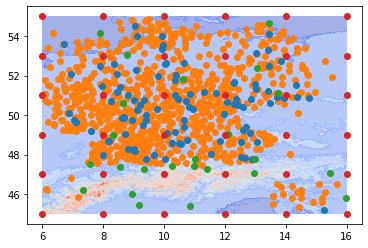

In [8]:
plt.scatter(train_lonlat_station[-100:, 0], train_lonlat_station[-100:, 1], zorder=3)
plt.scatter(train_lonlat_station[:-100, 0], train_lonlat_station[:-100, 1], zorder=2)
plt.scatter(valid_lonlat_station[:, 0], valid_lonlat_station[:, 1], zorder=4)
plt.scatter(lonlat_coarse[:, :, 0], lonlat_coarse[:, :, 1], zorder=5)
plt.contourf(lonlat_fine[:, :, 0], lonlat_fine[:, :, 1], elevation_fine, origin='lower', alpha=0.5, cmap='coolwarm', zorder=1)

plt.show()